# Download the CIFAR-10 dataset and reshape the data with the followingcommends Develop the classification model. Show the accuracy of each epoch.The python code of downloading and reshaping the data is provided.
Reference:  
https://www.cs.toronto.edu/~kriz/cifar.html  
https://www.tensorflow.org/datasets/catalog/cifar10

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers ,models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [13]:
(train_images,train_labels),(test_images, test_labels) = datasets.cifar10.load_data()
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape
x_val = train_images[-2000:,:,:,:] 
y_val = train_labels[-2000:] 
x_train = train_images[:-2000,:,:,:] 
y_train = train_labels[:-2000]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 32s 0us/step


In [336]:
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# plt.figure(figsize = (10, 10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i])
#     plt.xlabel(class_names[train_labels[i][0]])
# plt.show()

In [14]:
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3).astype("float32")
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3).astype("float32")
print(train_images.shape)
print(test_images.shape)
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [15]:
print(train_labels.shape)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels.shape)
print(test_labels.shape)

(50000, 1)
(50000, 10)
(10000, 10)


### (a) Using LeNet-5 architecture to build and train a CNN classification model.

In [72]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=train_images.shape[1:]))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
# 120 Fully Connected Layer
model.summary()

C:\Users\wayne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_59 (Conv2D)              │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1024)           │       123,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,146 (723.23 KB)

 Trainable params: 185,146 (723.23 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
from tensorflow.keras.optimizers import Adam
Adam_opt = Adam(learning_rate=0.001)
model.compile(optimizer=Adam_opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3016 - loss: 1.9121 - val_accuracy: 0.4130 - val_loss: 1.6198
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4014 - loss: 1.6483 - val_accuracy: 0.4050 - val_loss: 1.6519
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4413 - loss: 1.5445 - val_accuracy: 0.4565 - val_loss: 1.5049
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4712 - loss: 1.4794 - val_accuracy: 0.4585 - val_loss: 1.5025
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4959 - loss: 1.4023 - val_accuracy: 0.4890 - val_loss: 1.4232
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5034 - loss: 1.3836 - val_accuracy: 0.5135 - val_loss: 1.3678
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5315 - loss: 1.3207 - val_accuracy: 0.5120 - val_loss: 1.3707
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5367 - loss: 1.2840 - 

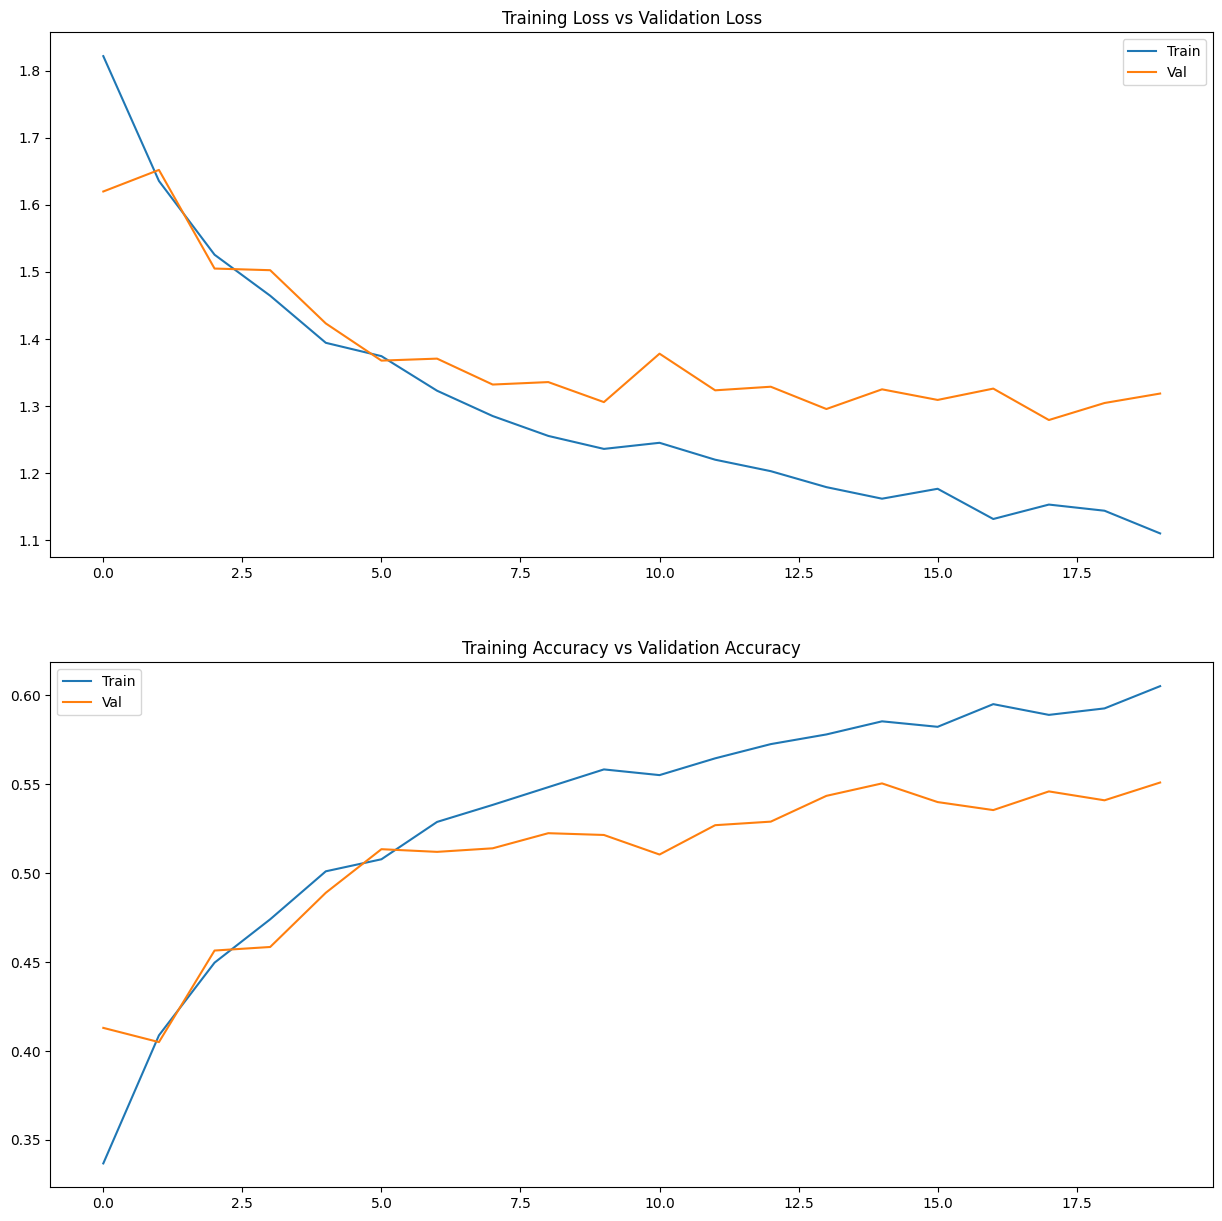

In [74]:
ig, axs = plt.subplots(2, 1, figsize=(15,15))  
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])

### (b) Using VGG16 to improve the model.

In [342]:
# from tensorflow.keras.applications.vgg16 import VGG16
# vgg16_model = VGG16(weights='imagenet',
#                     include_top=False, 
#                     classes=10,
#                     input_shape=(32,32,3)
#                    )

In [343]:
# model_vgg16 = models.Sequential()
# for layer in vgg16_model.layers:
#     model_vgg16.add(layer)
# from tensorflow.keras.layers import Dense, Flatten, Dropout
# model_vgg16.add(Flatten())
# model_vgg16.add(Dense(512, activation='relu', name='hidden1'))
# model_vgg16.add(Dropout(0.4))
# model_vgg16.add(Dense(256, activation='relu', name='hidden2'))
# model_vgg16.add(Dropout(0.4))
# model_vgg16.add(Dense(10, activation='softmax', name='predictions'))

# model_vgg16.summary()

In [56]:
from tensorflow.keras import layers, models

def vgg_block(layer_in, n_filters, dropout_rate=0.0):
    layer_in = layers.Conv2D(n_filters, (3,3), activation='relu', padding='same')(layer_in)
    layer_in = layers.MaxPooling2D((2,2), strides=(2,2))(layer_in)
    if dropout_rate > 0.0:
        layer_in = layers.Dropout(dropout_rate)(layer_in)  # 添加 Dropout 層
    return layer_in

visible = layers.Input(shape=(32, 32, 3))
layer = vgg_block(visible, 64, dropout_rate=0.05)  # 設置 Dropout 比率為 0.3
layer = vgg_block(layer, 128, dropout_rate=0.05)
layer = vgg_block(layer, 256, dropout_rate=0.05)

layer = layers.Flatten()(layer)
layer = layers.Dense(512, activation='relu')(layer)
layer = layers.Dropout(0.05)(layer)  # 添加一個 Dropout 層，比率為 0.5
output = layers.Dense(10, activation='softmax')(layer)

model_vgg16 = models.Model(inputs=visible, outputs=output)
model_vgg16.summary()


Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,473,610 (9.44 MB)

 Trainable params: 2,473,610 (9.44 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
from tensorflow.keras.optimizers import SGD
learning_rate = 0.001

SGD_optimizer = SGD(learning_rate=learning_rate)

model_vgg16.compile(optimizer=SGD_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_vgg16 = model_vgg16.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.2910 - loss: 2.4471 - val_accuracy: 0.4510 - val_loss: 1.5097
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4712 - loss: 1.4828 - val_accuracy: 0.5195 - val_loss: 1.3919
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5294 - loss: 1.3224 - val_accuracy: 0.5985 - val_loss: 1.1938
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5692 - loss: 1.2216 - val_accuracy: 0.6245 - val_loss: 1.1046
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5997 - loss: 1.1336 - val_accuracy: 0.6265 - val_loss: 1.0901
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6262 - loss: 1.0566 - val_accuracy: 0.6435 - val_loss: 1.0352
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6504 - loss: 0.9952 - val_accuracy: 0.6725 - val_loss: 0.9509
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6694 -

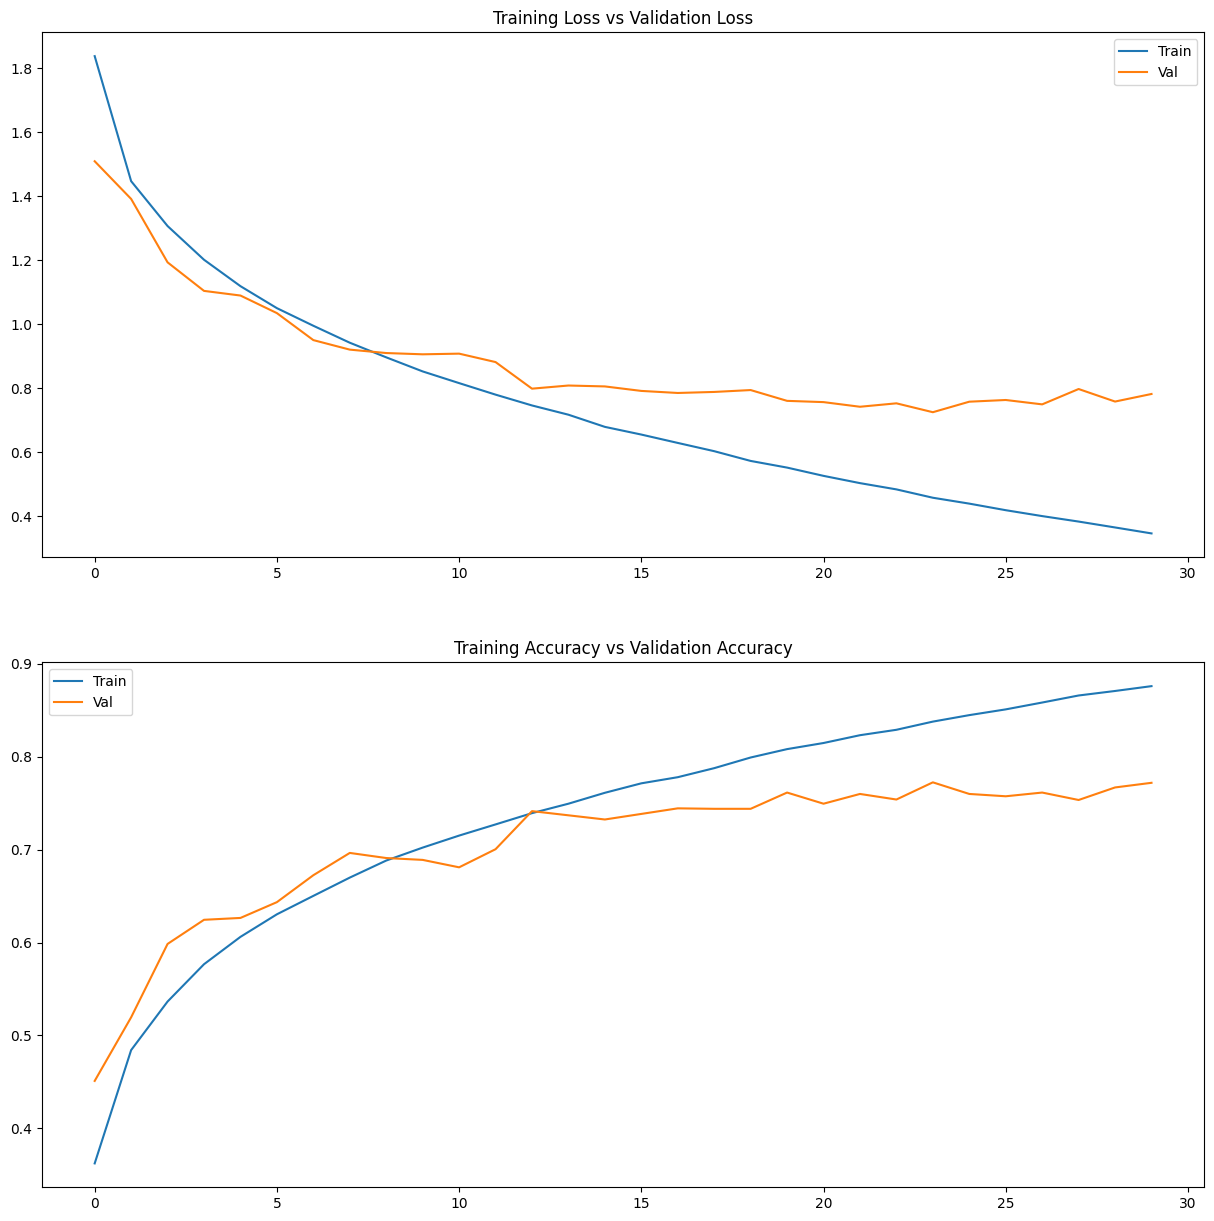

In [58]:
ig, axs = plt.subplots(2, 1, figsize=(15,15))  
axs[0].plot(history_vgg16.history['loss']) 
axs[0].plot(history_vgg16.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history_vgg16.history['accuracy']) 
axs[1].plot(history_vgg16.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])